В данной задаче вам предстоит решить задачу классификации изображений – отделить изображения кошек от изображений собак, используя классификацию с мягким зазором и параметром C.

В предложенном архиве находится выборка, включающая в себя изображения кошек и собак (по 500 изображений). Имя каждого изображения, для удобства, имеет следующий формат:  cat/dog.номер_изображения.jpg  в зависимости от того, какое животное присутствует на изображении. Данная выборка используется для обучения классификатора и оценки классификатора.
Следующая выборка предназначена для классификации новых объектов после построения классификатора.

При считывании набора данных (картинок) из папки для построения гистограммы отсортируйте названия по алфавиту, например, так (иначе тренировочные наборы данных могут отличаться даже при фиксированном random_seed):

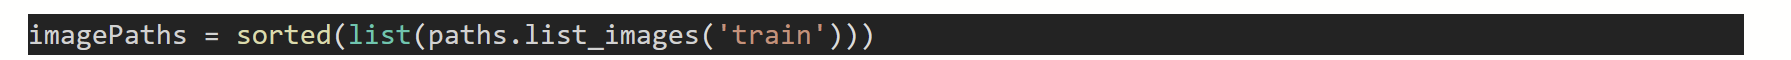

Котов закодируйте нулями, а собак — единицей.

- Обучите классификатор LinearSVC() при C = 0.51 и random_state = 9 на предложенной выборке. Используйте параметр random_state = 9 для разделения выборки на тренировочную и тестовую части, в отношении 75/25 функции train_test_split()
- Найти значение коэффициента $θ_{257}$ построенной гиперплоскости
- Найти значение коэффициента $θ_{371}$ построенной гиперплоскости
- Найти значение коэффициента $θ_{125}$ построенной гиперплоскости
- Составить матрицу ошибок для каждого класса, рассчитайте точность (precision) и полноту (recall). Затем вычислите значение метрики F1 для каждого класса
- ВыполнитM предсказание для изображений, указанных ниже

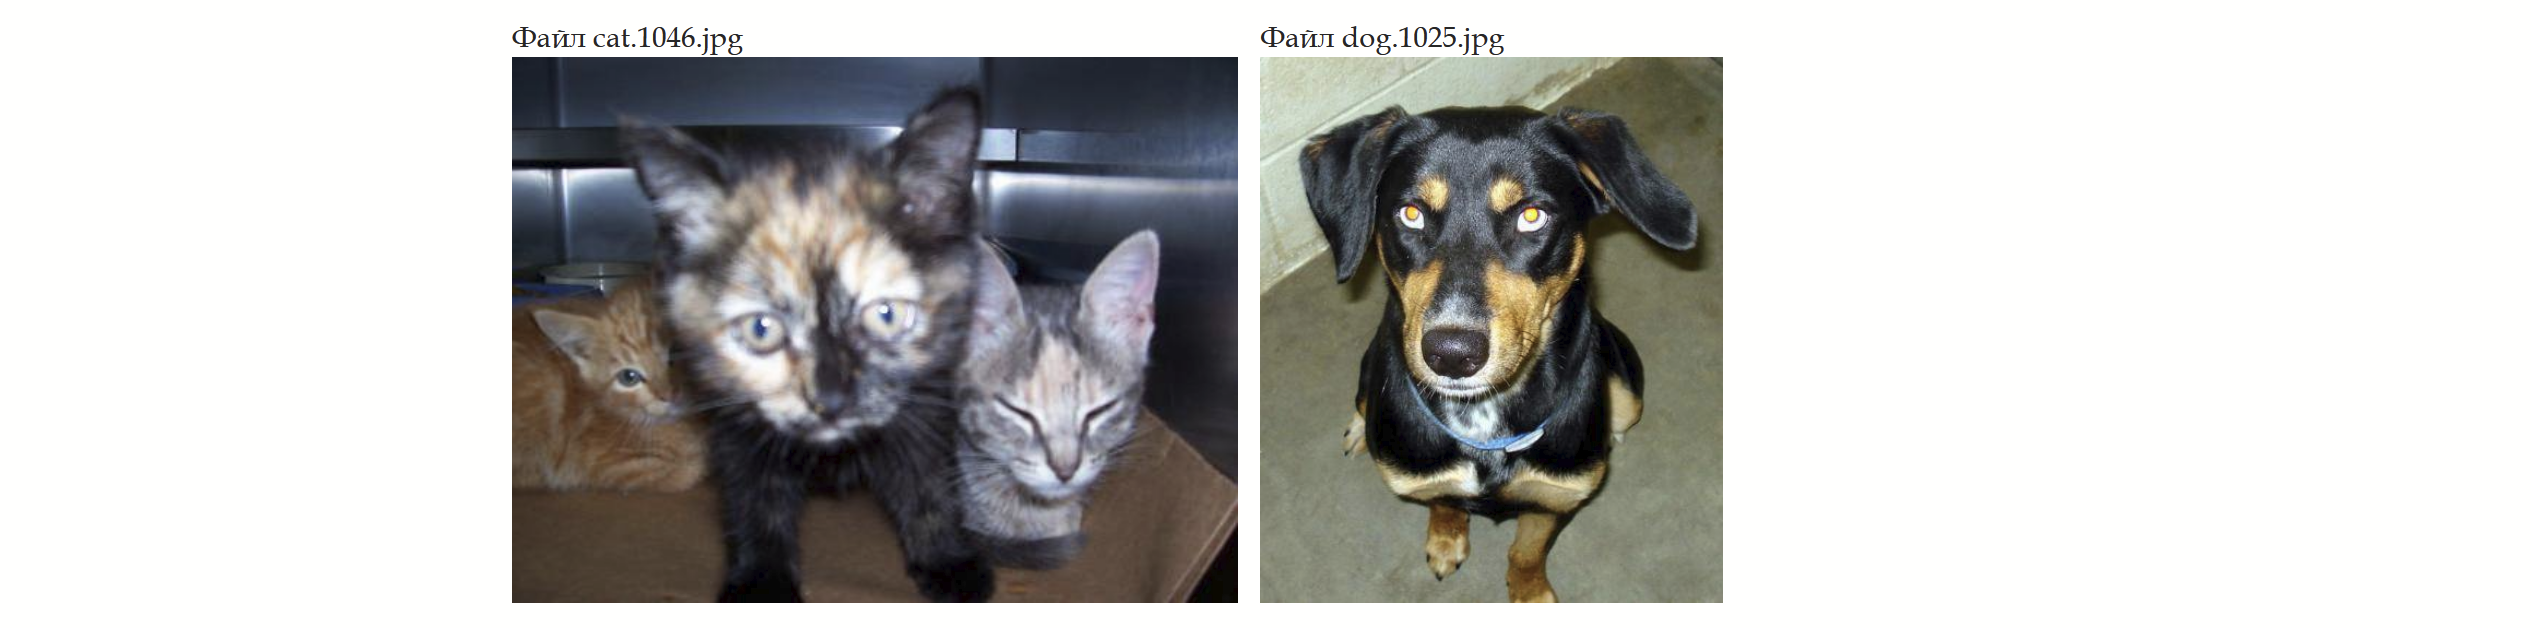

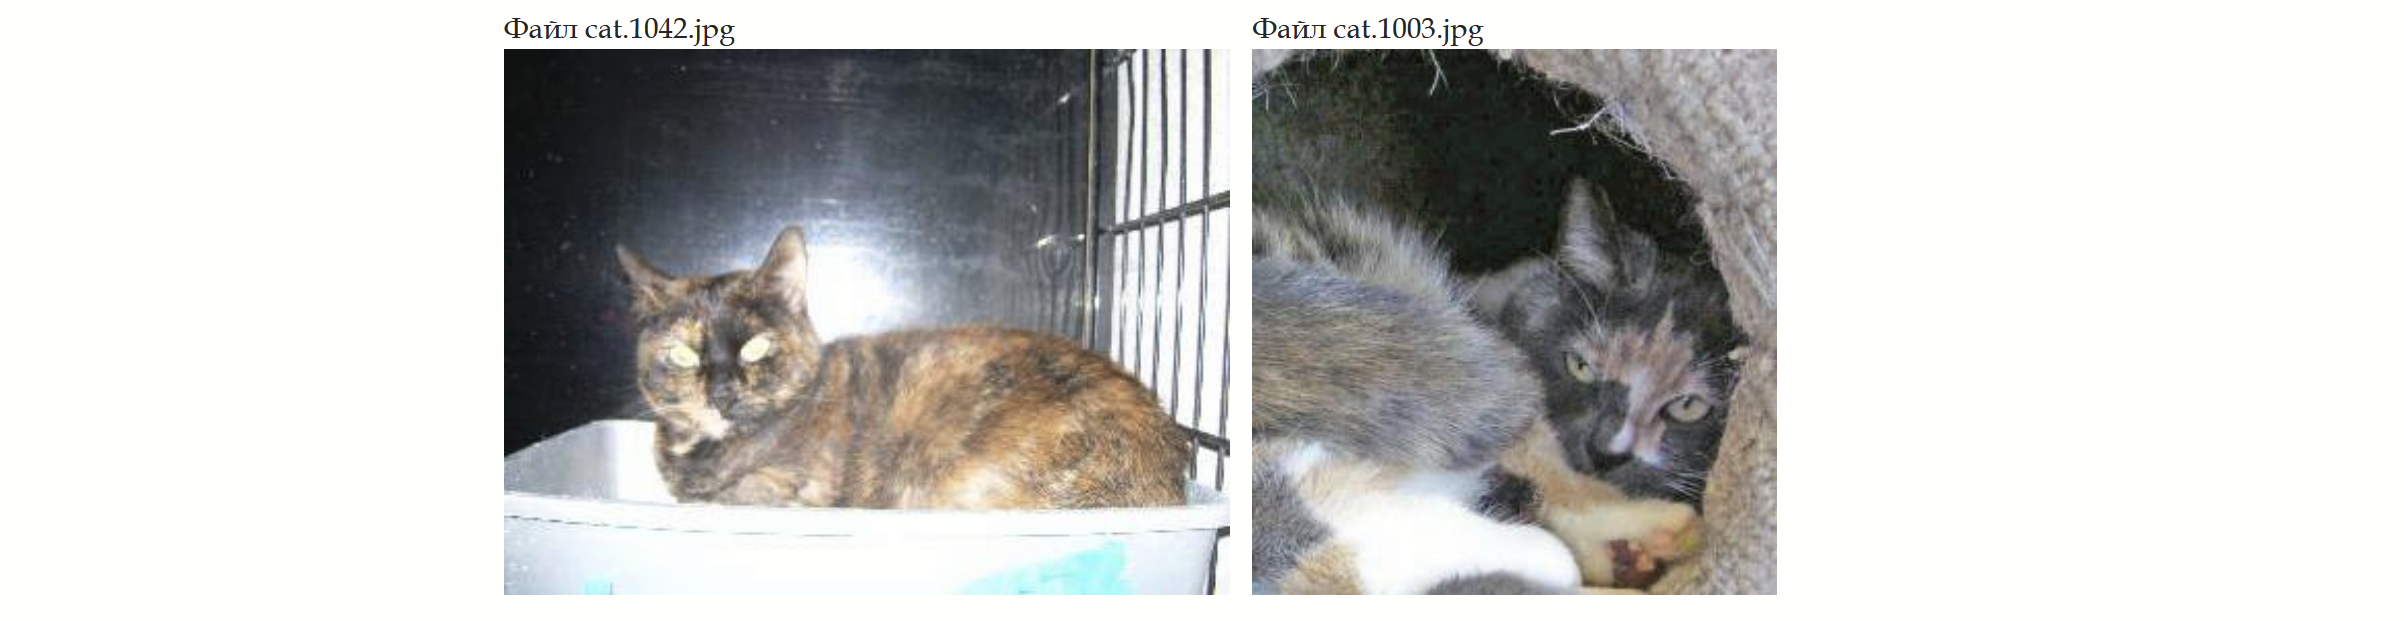

Для начала выполним необходимые подготовительные действия.

In [199]:
!git clone https://github.com/mihneh/ITMO_ML_labs.git

fatal: destination path 'ITMO_ML_labs' already exists and is not an empty directory.


In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
import pathlib
from pathlib import Path
import cv2
import os

In [201]:
# Функции извлечения гистограммы+уменьшение размерности и считывания imgs с указанного path
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()
# Функция считывания изображений
def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [202]:
# Задание путей к тренировочным и тестовым данным
train_img_dir = '/content/ITMO_ML_labs/lab_SVM/train_task/train'
test_img_dir = '/content/ITMO_ML_labs/lab_SVM/test_task/test'

In [203]:
# Считывание данных в train_imgs и test_imgs
train_imgs = load_images_from_folder(train_img_dir)
print(len(train_imgs))
test_imgs = load_images_from_folder(test_img_dir)
Y_train = []
hists_train_imgs = []
hist_test_imgs = []

1000


In [204]:
# Извлечение гистограмм из тренировочных данных и маркировка тренировочных данных
for i in range(len(train_imgs)):
    hists_train_imgs.append(extract_histogram(train_imgs[i]))
    if os.listdir(train_img_dir)[i][0] == 'c':
        Y_train.append(0)
    # elif os.listdir(train_img_dir)[i][0] == 'd':
    else:
        Y_train.append(1)
print(len(Y_train))

1000


In [205]:
# Извлечение гистограмм из тестовых данных (посдений пункт - из него берутся 3 фотографии и классифицируются)
samples = [3, 25+50, 42, 46]
for i in samples:
    hist_test_imgs.append(extract_histogram(test_imgs[i]))

In [206]:
Y_train = np.array(Y_train)
hists_train_imgs = np.array(hists_train_imgs)
hist_test_imgs = np.array(hist_test_imgs)
# print(len(Y_train), np.array(Y_train).shape)
# print(len(hists_train_imgs), np.array(hists_train_imgs).shape)

Приступим к выполнению задания.

In [207]:
model = LinearSVC(C=0.51, random_state=9)
X_train, X_test, y_train, y_test = train_test_split(hists_train_imgs, Y_train, test_size=0.25, random_state=9)
# print(X_train.shape)
# print(y_train.shape)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [208]:
print('Teta_257', model.coef_[:, 256])
print('Teta_371', model.coef_[:, 370])
print('Teta_125', model.coef_[:, 124])
# print(model.coef_)
# print(np.array(model.coef_).shape)

recall = recall_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
F1 = 2*precision*recall/(precision+recall)
conf_m = confusion_matrix(y_test, y_predict)
report = classification_report(y_test, y_predict)
print('recall: ', recall)
print('precision: ', precision)
print('F1: ', F1)
print('conf_m: ', conf_m)
# print(report)

y_predict = model.predict(hist_test_imgs)
print('Предсказание для изображения cat.1003.jpg: ', y_predict[0])
print('Предсказание для изображения dog.1025.jpg: ', y_predict[1])
print('Предсказание для изображения cat.1042.jpg: ', y_predict[2])
print('Предсказание для изображения cat.1046.jpg: ', y_predict[3])

Teta_257 [-0.00418711]
Teta_371 [0.05526902]
Teta_125 [-0.00061903]
recall:  0.5258620689655172
precision:  0.45864661654135336
F1:  0.48995983935742976
conf_m:  [[62 72]
 [55 61]]
Предсказание для изображения cat.1003.jpg:  1
Предсказание для изображения dog.1025.jpg:  1
Предсказание для изображения cat.1042.jpg:  1
Предсказание для изображения cat.1046.jpg:  1
